In [1]:
#Cargar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Número de exámenes PCR realizados hasta hoy en la Región del BioBio
https://github.com/MinCiencia/Datos-COVID19

In [2]:
#Carga datos desde github
pcr_biobio=pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv")

In [3]:
#pcr_biobio['Region'].unique()

In [4]:
#Filtramos por region del biobío
pcr_biobio = pcr_biobio[pcr_biobio['Region'] == 'Biobío']
#Eliminamos columnas que no aporten información
pcr_biobio = pcr_biobio.drop(['Codigo region', 'Poblacion',], axis=1).reset_index()

In [5]:
#Revisar los datos en columnas
pcr_biobio.columns

Index(['index', 'Region', '2020-04-09', '2020-04-10', '2020-04-11',
       '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
       ...
       '2021-01-29', '2021-01-30', '2021-01-31', '2021-02-01', '2021-02-02',
       '2021-02-03', '2021-02-04', '2021-02-05', '2021-02-06', '2021-02-07'],
      dtype='object', length=307)

In [6]:
#sumatoria de los datos
np.sum(pcr_biobio.drop(['index','Region'], axis=1), axis = 0)

2020-04-09     592.0
2020-04-10     149.0
2020-04-11     281.0
2020-04-12     469.0
2020-04-13       0.0
               ...  
2021-02-03    3902.0
2021-02-04    6158.0
2021-02-05    5892.0
2021-02-06    5940.0
2021-02-07    5427.0
Length: 305, dtype: float64

In [7]:
pcr_biobio1 = pcr_biobio.drop(['index','Region'], axis=1).T

In [8]:
total_pcr_biobio = pcr_biobio.drop(['index','Region'], axis=1).T.sum()
print('Total PCR realizados en Biobio al',pcr_biobio1.iloc[0].name,':', total_pcr_biobio[0])

Total PCR realizados en Biobio al 2020-04-09 : 838797.0


In [9]:
type(total_pcr_biobio)

pandas.core.series.Series

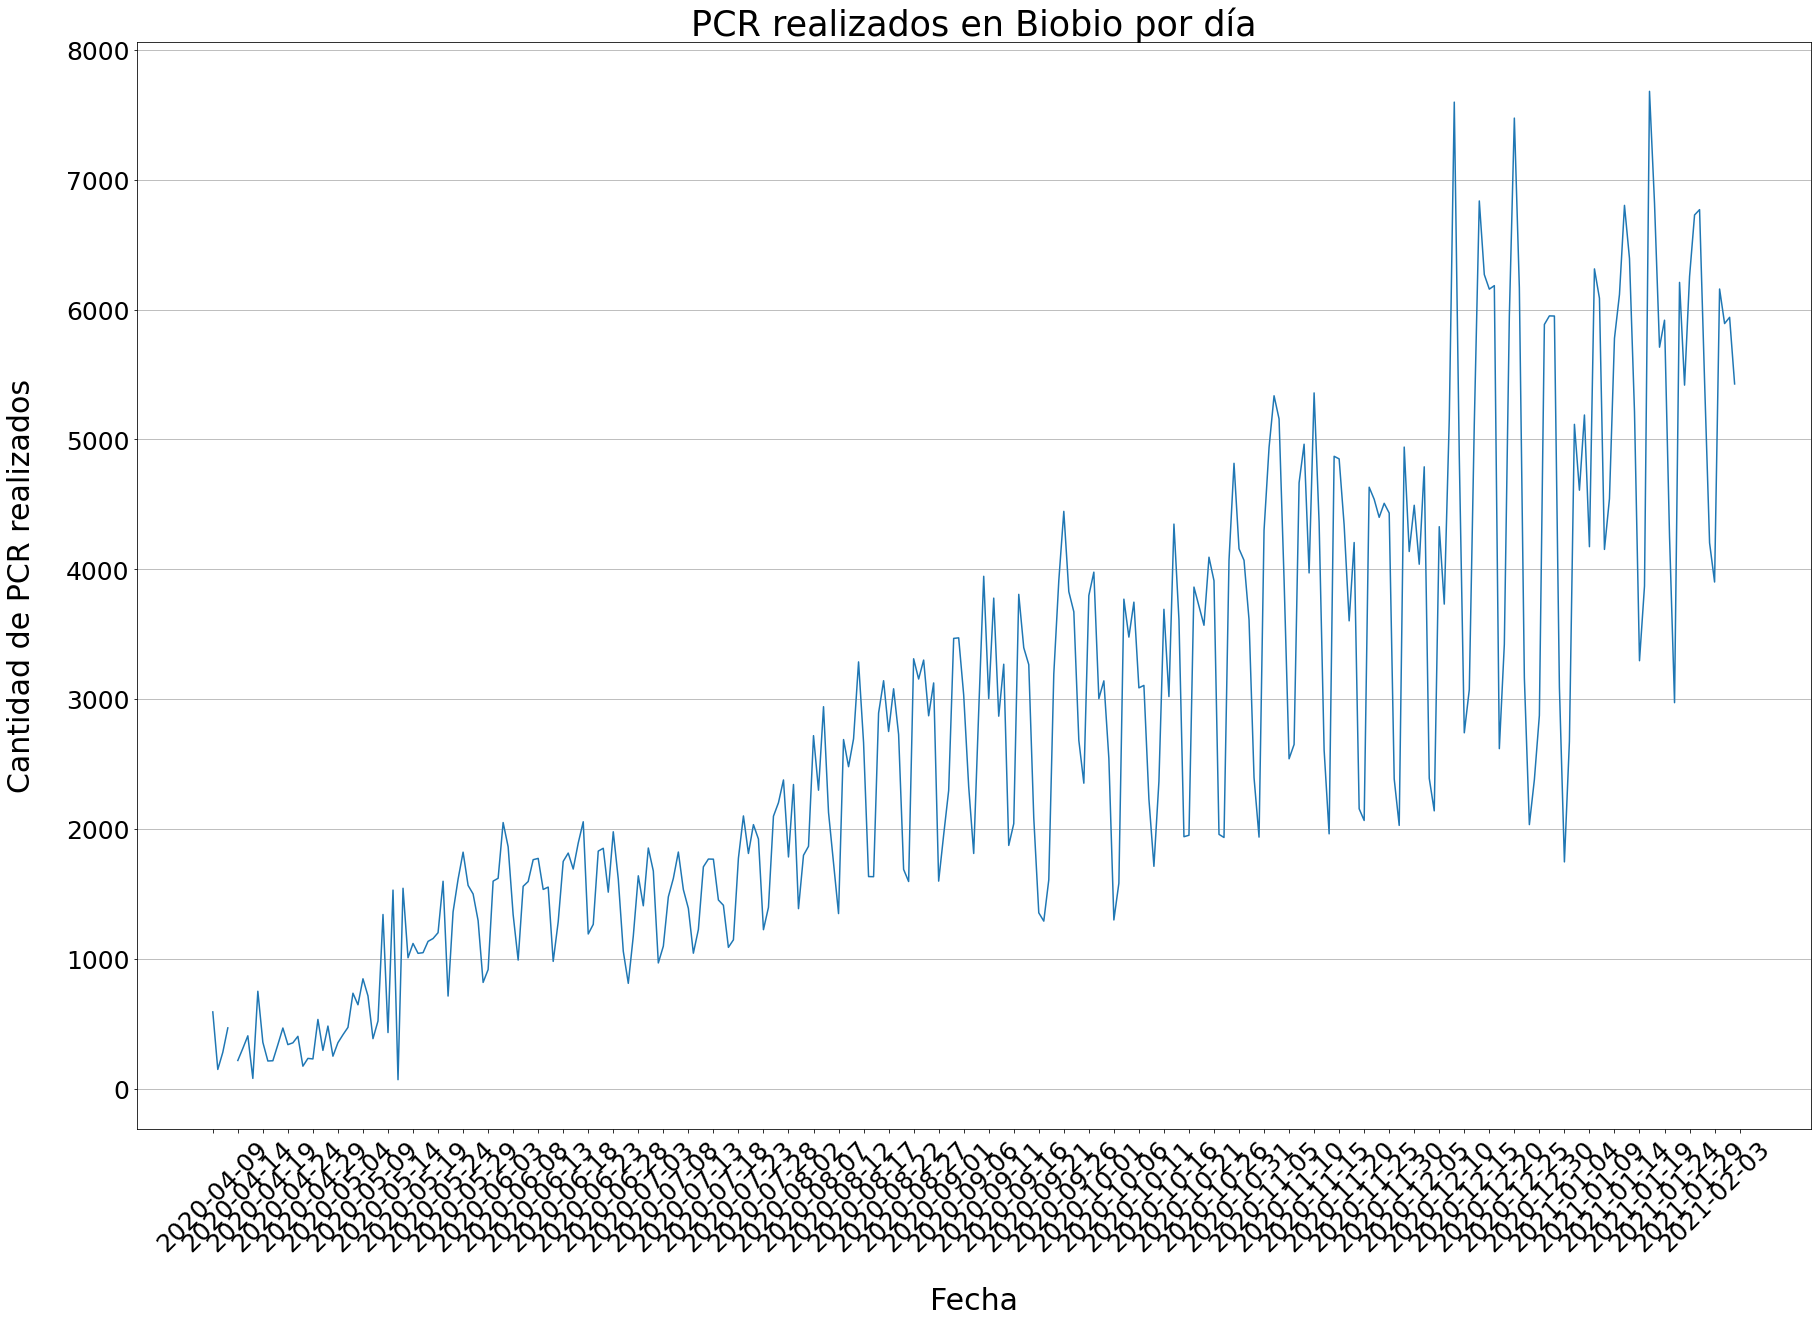

In [10]:
#Grafica pcr
plt.figure(figsize=(30,20))
plt.plot(pcr_biobio1,'')
plt.xticks(np.arange(pcr_biobio.shape[1])[::5] ,pcr_biobio.drop(["index","Region"],axis=1).columns[::5],rotation=45, fontsize = 25)
plt.yticks(fontsize = 25)
plt.gca().yaxis.grid(True)
plt.xlabel('Fecha',  labelpad = 30, fontsize = 30)
plt.ylabel('Cantidad de PCR realizados',labelpad = 30, fontsize = 30)
plt.title('PCR realizados en Biobio por día', fontsize = 35)
plt.savefig("PCR_realizados_biobio.png")

## Número de exámenes positivos  "...........".

In [104]:
#Carga de datos desde github
positividad_biobio = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto55/Positividad_por_region.csv')

In [105]:
# #Vista datos
# positividad_biobio.columns
# #Vista datos por region
# positividad_biobio['region_residencia'].unique()
positividad_biobio

,Region,Codigo region,region_residencia,fecha,positividad
0,Antofagasta,2,Región de Antofagasta,2020-03-02,NaN
1,Antofagasta,2,Región de Antofagasta,2020-03-03,NaN
2,Antofagasta,2,Región de Antofagasta,2020-03-04,NaN
3,Antofagasta,2,Región de Antofagasta,2020-03-05,NaN
4,Antofagasta,2,Región de Antofagasta,2020-03-06,NaN
...,...,...,...,...,...
5217,Metropolitana,13,Región Metropolitana de Santiago,2021-01-25,0.053422
5218,Metropolitana,13,Región Metropolitana de Santiago,2021-01-26,0.052717
5219,Metropolitana,13,Región Metropolitana de Santiago,2021-01-27,0.052186
5220,Metropolitana,13,Región Metropolitana de Santiago,2021-01-28,0.049807


In [106]:
#Limpieza de datos y filtro por region biobio
positividad_biobio = positividad_biobio[positividad_biobio['Region'] == 'Biobío'].reset_index(drop = True)
positividad_biobio = positividad_biobio.drop(['Region','Codigo region','region_residencia'], axis=1)
positividad_biobio

,fecha,positividad
0,2020-03-02,NaN
1,2020-03-03,NaN
2,2020-03-04,NaN
3,2020-03-05,NaN
4,2020-03-06,NaN
...,...,...
329,2021-01-25,0.089659
330,2021-01-26,0.089191
331,2021-01-27,0.084659
332,2021-01-28,0.084323


In [98]:
pcr_biobio = pcr_biobio.T.reset_index().rename({"index":"fecha",0:"pcr"},axis=1)

In [99]:
# unir las tablas para sacar cantidad de positivos
#merge interseccion de cjtos
pcr_positivo =pcr_biobio.merge(positividad_biobio)

In [17]:
# la positividad = test positivos / test totales
pcr_positivo["positivos"] = pcr_positivo["pcr"] * pcr_positivo["positividad"]
#regla de tres simples

In [18]:
#los valores NA de la columna positivos seran '0'
pcr_positivo["positivos"] = pcr_positivo["positivos"].fillna(0).astype(int)
pcr_positivo

,fecha,pcr,positividad,positivos
0,2020-04-09,592,0.060519,35
1,2020-04-10,149,0.052039,7
2,2020-04-11,281,0.050241,14
3,2020-04-12,469,0.050512,23
4,2020-04-13,NaN,0.049049,0
...,...,...,...,...
291,2021-01-25,4254,0.089659,381
292,2021-01-26,2973,0.089191,265
293,2021-01-27,6209,0.084659,525
294,2021-01-28,5418,0.084323,456


In [19]:
#pcr_positivo.columns

In [20]:
pcr_positivo["fecha"]

0      2020-04-09
1      2020-04-10
2      2020-04-11
3      2020-04-12
4      2020-04-13
          ...    
291    2021-01-25
292    2021-01-26
293    2021-01-27
294    2021-01-28
295    2021-01-29
Name: fecha, Length: 296, dtype: object

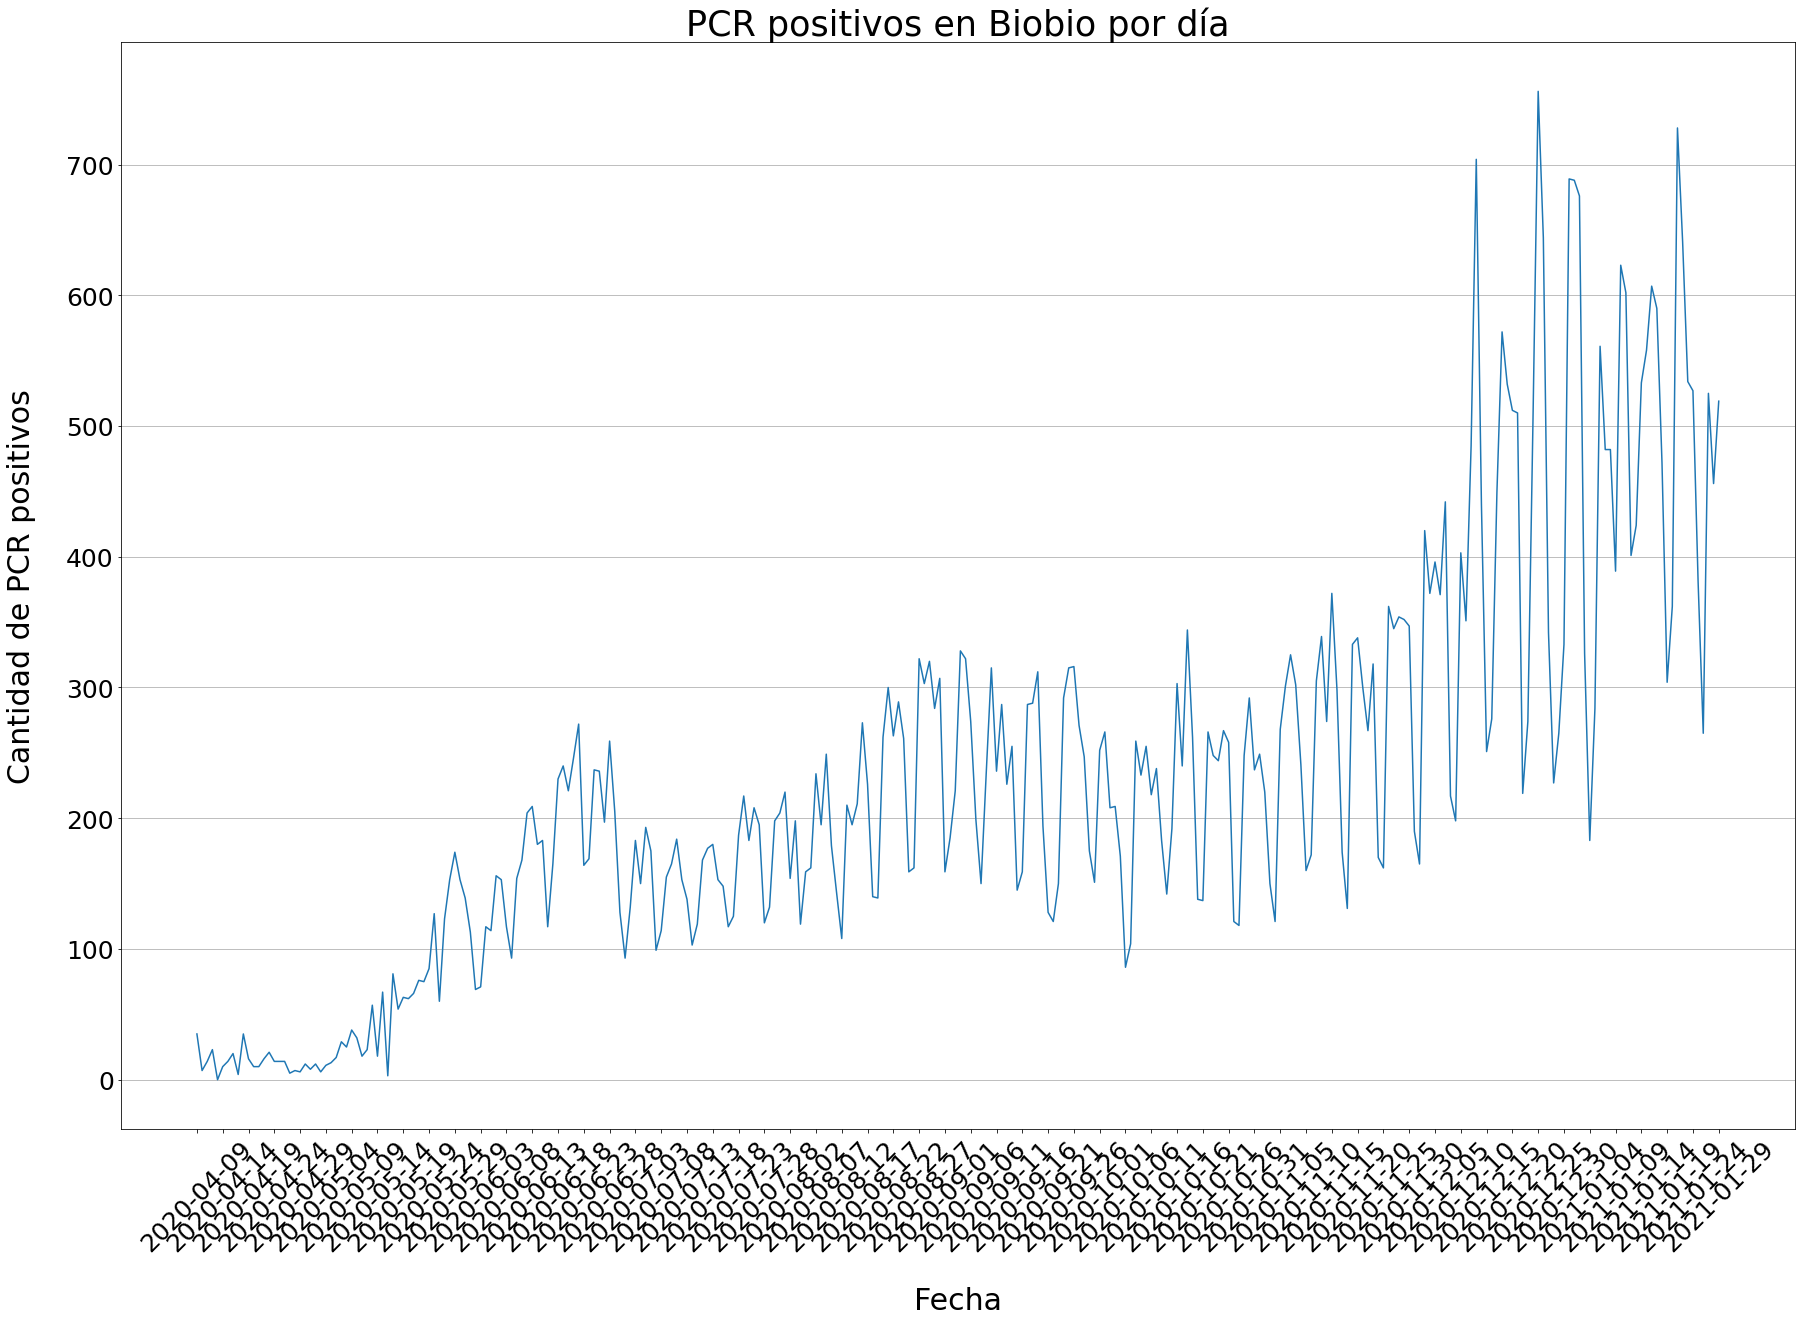

In [21]:
#Grafica pcr positivos
plt.figure(figsize=(30,20))
plt.plot(pcr_positivo["fecha"],pcr_positivo["positivos"])
plt.xticks(pcr_positivo["fecha"][::5],rotation=45, fontsize = 25)
plt.yticks(fontsize = 25)
plt.gca().yaxis.grid(True)
plt.xlabel('Fecha',  labelpad = 30, fontsize = 30)
plt.ylabel('Cantidad de PCR positivos',labelpad = 30, fontsize = 30)
plt.title('PCR positivos en Biobio por día', fontsize = 35)
plt.savefig("PCR positivos_biobio.png")

## Pacientes en UCI por edad Chile

In [22]:
#Carga de datos
uci_edad = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto9/HospitalizadosUCIEtario_T.csv")

In [23]:
uci_edad = uci_edad.rename({"Grupo de edad":"Fecha"},axis=1)
#uci_edad

In [24]:
#uci_edad.columns

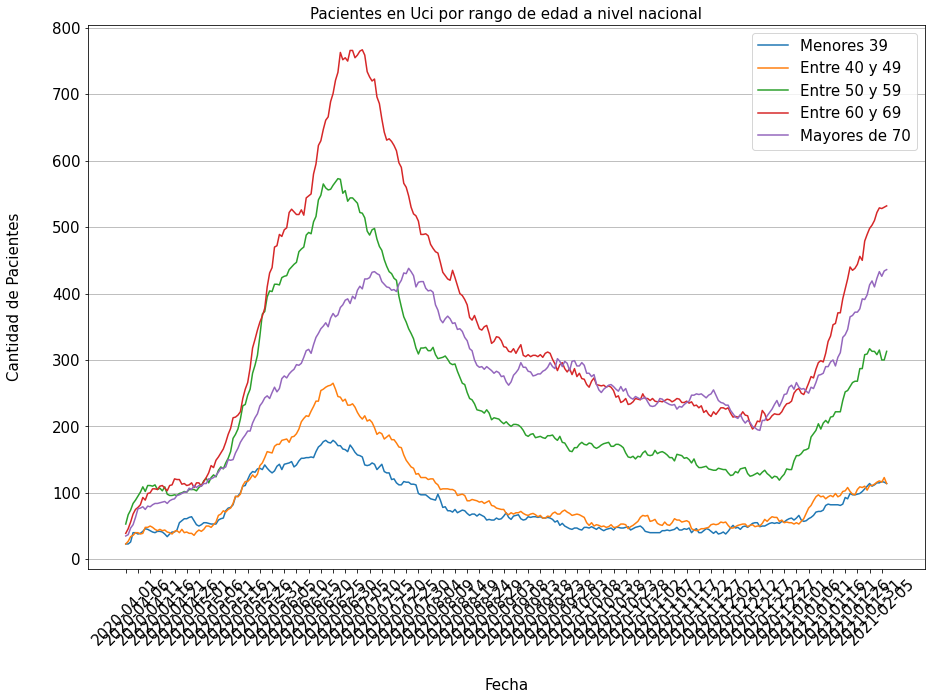

In [25]:
plt.figure(figsize=(15,10))
plt.plot(uci_edad['Fecha'],uci_edad['<=39'],label="Menores 39")
plt.plot(uci_edad['Fecha'],uci_edad['40-49'],label = 'Entre 40 y 49')
plt.plot(uci_edad['Fecha'],uci_edad['50-59'], label = 'Entre 50 y 59')
plt.plot(uci_edad['Fecha'],uci_edad['60-69'], label = 'Entre 60 y 69')
plt.plot(uci_edad['Fecha'],uci_edad['>=70'], label = 'Mayores de 70')
plt.legend(fontsize = 15)
plt.gca().yaxis.grid(True)
plt.xticks(uci_edad['Fecha'][::5],rotation=45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Fecha',  labelpad = 30, fontsize = 15)
plt.ylabel('Cantidad de Pacientes',labelpad = 30, fontsize = 15)
plt.title('Pacientes en Uci por rango de edad a nivel nacional', fontsize = 15)
plt.savefig("Pacientes_uci_edad_chile.png")

In [26]:
#np.argmax(uci_edad['<=39'])
#uci_edad.iloc[np.argmax(uci_edad['<=39'])].Fecha

In [27]:
'Mayor día de uci menores de 39 en Chile: {} el {}'.format(uci_edad['<=39'].max(), uci_edad.iloc[np.argmax(uci_edad['<=39'])].Fecha)

'Mayor día de uci menores de 39 en Chile: 179 el 2020-06-22'

In [28]:
#Mayores cantidades a nivel nacional
print('Mayor día de uci menores de 39 en Chile:',uci_edad['<=39'].max(), 'el',uci_edad.iloc[np.argmax(uci_edad['<=39'])].Fecha )
print('Mayor día de uci entre 40 y 49 en Chile:',uci_edad['40-49'].max(), 'el',uci_edad.iloc[np.argmax(uci_edad['40-49'])].Fecha )
print('Mayor día de uci entre 50 y 59 en Chile:',uci_edad['50-59'].max(), 'el',uci_edad.iloc[np.argmax(uci_edad['50-59'])].Fecha )
print('Mayor día de uci entre 60 y 69 en Chile:',uci_edad['60-69'].max(), 'el',uci_edad.iloc[np.argmax(uci_edad['60-69'])].Fecha )
print('Mayor día de uci mayores de 70 en Chile:',uci_edad['>=70'].max(), 'el',uci_edad.iloc[np.argmax(uci_edad['>=70'])].Fecha )

Mayor día de uci menores de 39 en Chile: 179 el 2020-06-22
Mayor día de uci entre 40 y 49 en Chile: 265 el 2020-06-25
Mayor día de uci entre 50 y 59 en Chile: 573 el 2020-06-27
Mayor día de uci entre 60 y 69 en Chile: 767 el 2020-07-07
Mayor día de uci mayores de 70 en Chile: 438 el 2020-07-26


## Casos por edad Chile

In [29]:
#Carga de datos
uci_edad = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto9/HospitalizadosUCIEtario_T.csv")
uci39 = uci_edad['<=39'].sum()
uci40 = uci_edad['40-49'].sum()
uci50 = uci_edad['50-59'].sum()
uci60 = uci_edad['60-69'].sum()
uci70 = uci_edad['>=70'].sum()

In [30]:
#Carga de datos
covid_edad = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto16/CasosGeneroEtario.csv')
covid_edad.groupby(['Grupo de edad'])

In [31]:
covid_edad = covid_edad[["Grupo de edad","Sexo","2020-10-24"]].groupby(["Grupo de edad"]).sum()

In [32]:
#covid_edad['2020-10-24']

In [33]:
covid39 = covid_edad['2020-10-24'].iloc[0:8].sum()
covid40 = covid_edad['2020-10-24'].iloc[8:10].sum()
covid50 = covid_edad['2020-10-24'].iloc[10:12].sum()
covid60 = covid_edad['2020-10-24'].iloc[12:14].sum()
covid70 = covid_edad['2020-10-24'].iloc[14:17].sum()

In [34]:
labels = ['<=39', '40-49', '50-59','60-69','>=70']
uci = [uci39,uci40,uci50,uci60,uci70]
covid = [covid39,covid40,covid50,covid60,covid70]
x = np.arange(len(labels))

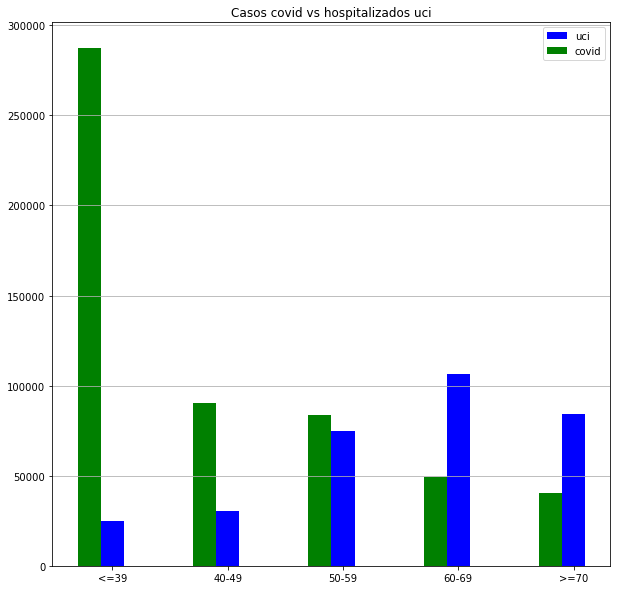

In [35]:
plt.figure(figsize=(10,10))
plt.bar(x,uci,width=0.2, color='b', align='center',label="uci")
plt.bar(x-0.2,covid,width=0.2, color='g', align='center',label="covid")
plt.xticks(x,labels)
plt.legend()
plt.title('Casos covid vs hospitalizados uci')
plt.gca().yaxis.grid(True)

## Casos por género

In [36]:
#Carga de datos y filtro
genero_covid = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto16/CasosGeneroEtario.csv')
mujer = genero_covid[genero_covid["Sexo"] == 'F'].reset_index(drop = True)
hombre = genero_covid[genero_covid["Sexo"] == 'M']

In [37]:
mujer_aux = mujer.drop(["Sexo","Grupo de edad"],axis=1).sum()
hombre_aux = hombre.drop(["Sexo","Grupo de edad"],axis=1).sum()

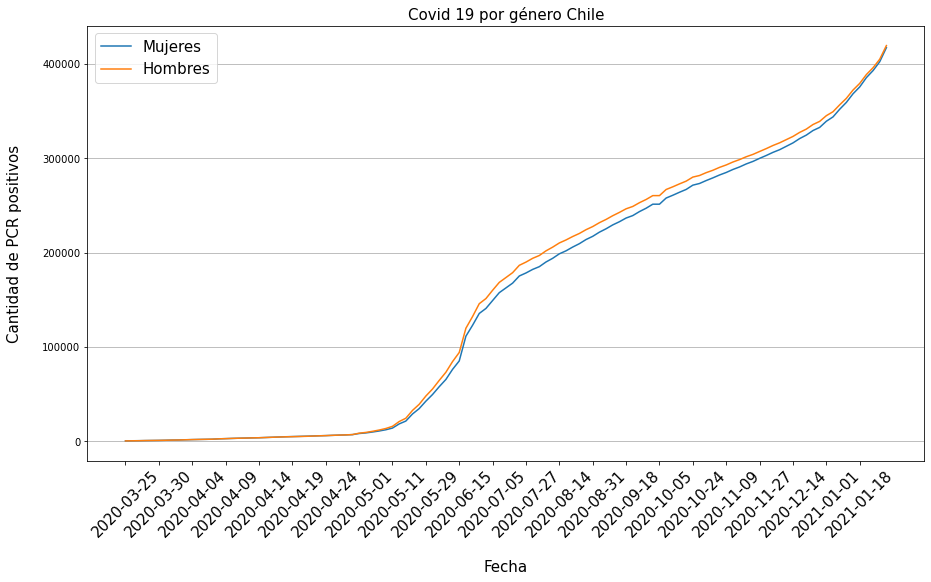

In [38]:
plt.figure(figsize=(15,8))
plt.plot(mujer_aux.index,mujer_aux.values, label = 'Mujeres')
plt.plot(hombre_aux.index,hombre_aux.values, label = 'Hombres')
plt.legend(fontsize =  15)
plt.xticks(mujer_aux.index[::5],rotation=45, fontsize = 15)
plt.yticks(fontsize = 10)
plt.gca().yaxis.grid(True)
plt.xlabel('Fecha',  labelpad = 20, fontsize =  15)
plt.ylabel('Cantidad de PCR positivos',labelpad = 20, fontsize =  15)
plt.title('Covid 19 por género Chile', fontsize =  15)
plt.savefig("Covid 19 por genero Chile.png")

## Casos totales por día en el Biobio

In [39]:
#Carga de datos
total_biobio = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo_T.csv")

In [40]:
#total_biobio.columns

In [41]:
total_biobio = total_biobio.rename({"Region":"Fecha"},axis=1)
#total_biobio

In [42]:
total_biobio.columns

Index(['Fecha', 'Arica y Parinacota', 'Tarapacá', 'Antofagasta', 'Atacama',
       'Coquimbo', 'Valparaíso', 'Metropolitana', 'O’Higgins', 'Maule',
       'Ñuble', 'Biobío', 'Araucanía', 'Los Ríos', 'Los Lagos', 'Aysén',
       'Magallanes', 'Total'],
      dtype='object')

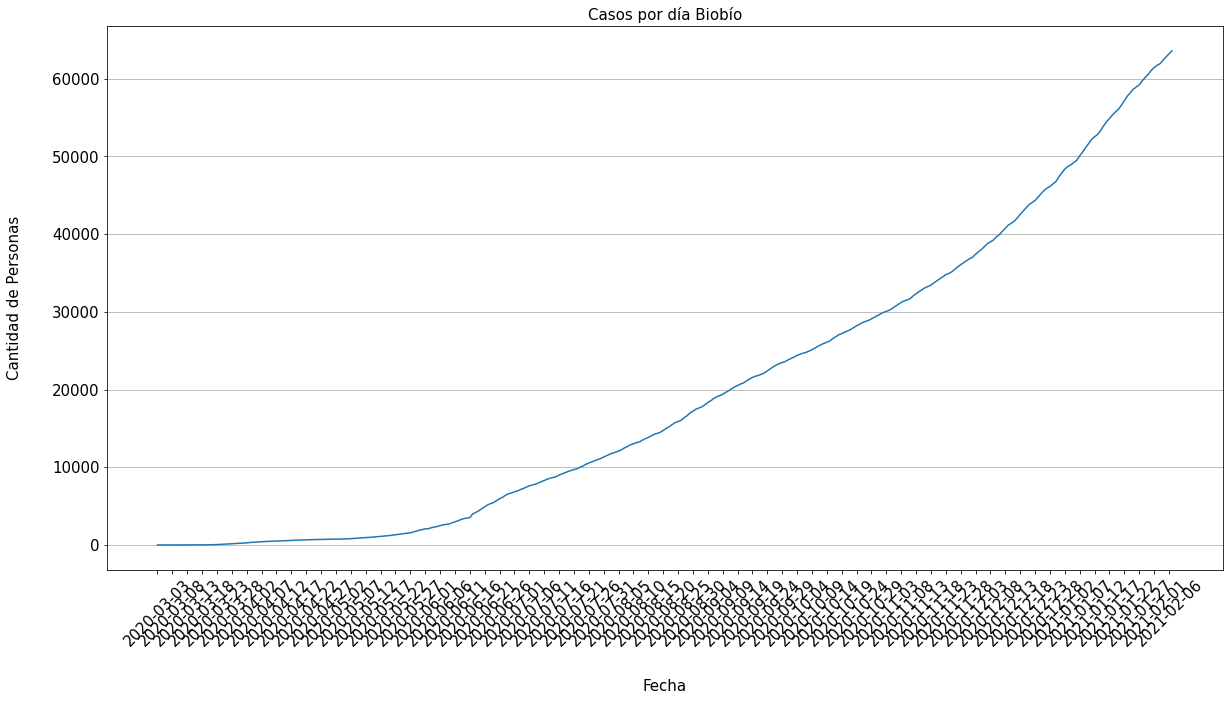

In [43]:
plt.figure(figsize=(20,10))
plt.plot(total_biobio['Fecha'],total_biobio['Biobío'])
plt.xticks(total_biobio['Fecha'][::5],rotation=45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.gca().yaxis.grid(True)
plt.xlabel('Fecha',  labelpad = 30, fontsize = 15)
plt.ylabel('Cantidad de Personas',labelpad = 30, fontsize = 15)
plt.title('Casos por día Biobío', fontsize = 15)
plt.savefig("Casos por día Biobío.png")

## Casos Asintomatico vs Sintomaticos

In [44]:
#Carga de datos
casos_sin_sintomas = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto27/CasosNuevosSinSintomas_T.csv")
casos_con_sintomas = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto26/CasosNuevosConSintomas_T.csv")

In [45]:
#Filtro de datos
casos_sin_sintomas = casos_sin_sintomas.rename({"Region":"Fecha"},axis=1)
casos_con_sintomas = casos_con_sintomas.rename({"Region":"Fecha"},axis=1)

In [46]:
casos_con_sintomas = casos_con_sintomas[['Fecha','Biobío']].reset_index(drop=True)
casos_sin_sintomas = casos_sin_sintomas[['Fecha', 'Biobío']]

In [47]:
#casos_con_sintomas
#casos_sin_sintomas

In [48]:
#Mezcla de datos
casos_total = pd.merge(casos_con_sintomas,casos_sin_sintomas,on = 'Fecha')

In [49]:
fechas = casos_sin_sintomas["Fecha"].unique()

In [50]:
casos_con_sintomas =casos_con_sintomas[casos_con_sintomas.Fecha.isin(fechas)]

In [51]:
#casos_con_sintomas['Fecha'].shape

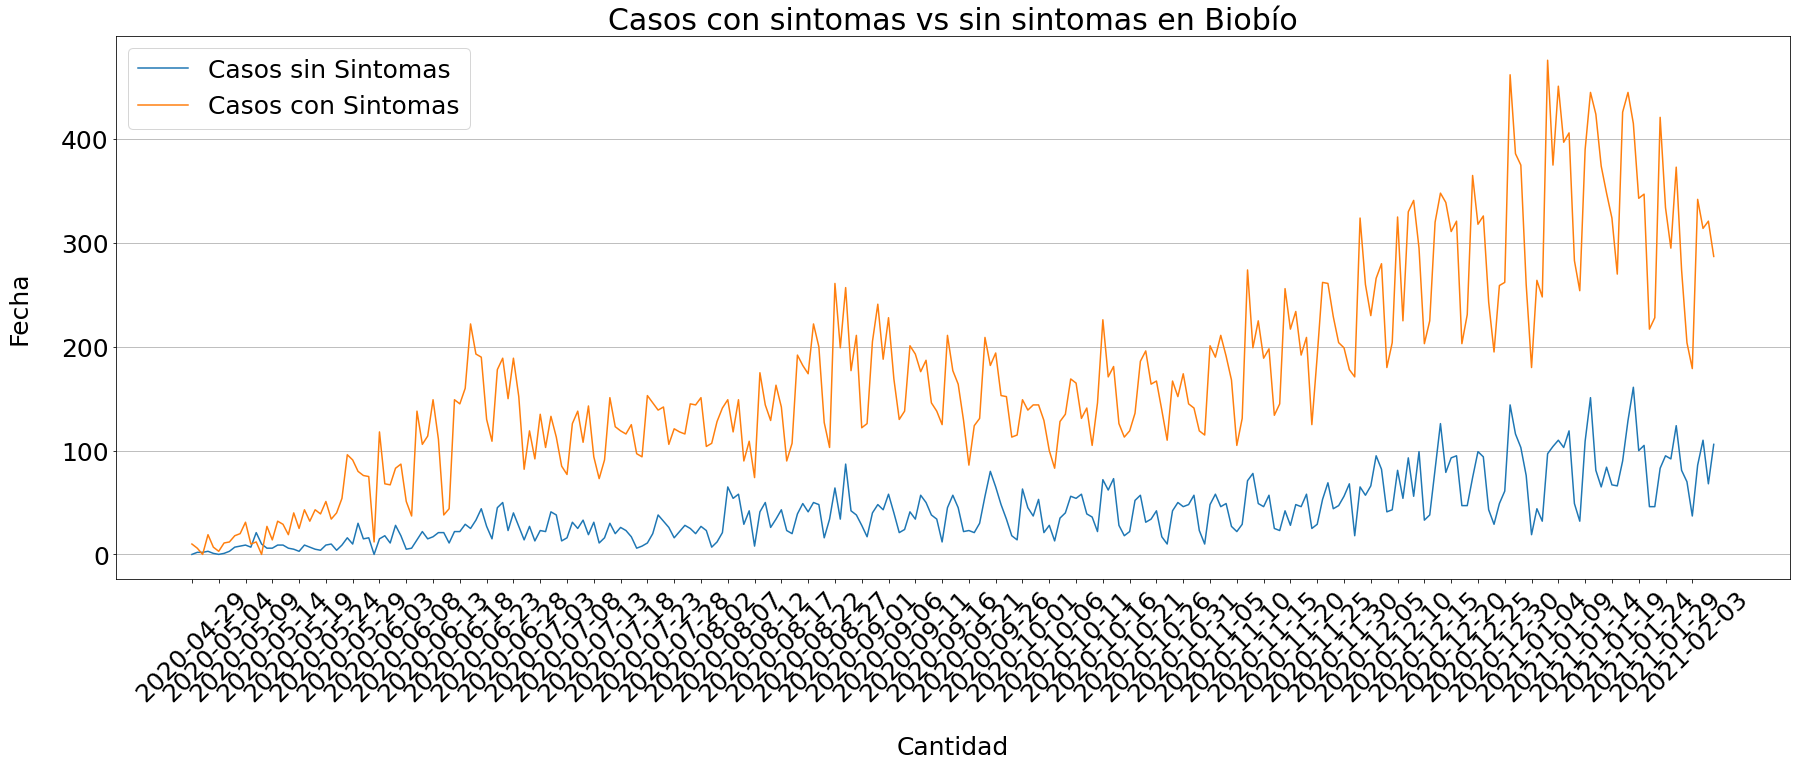

In [52]:
plt.figure(figsize=(30,10))
plt.plot(casos_sin_sintomas['Fecha'],casos_sin_sintomas['Biobío'], label = 'Casos sin Sintomas')
plt.plot(casos_con_sintomas['Fecha'],casos_con_sintomas['Biobío'], label = 'Casos con Sintomas')
plt.xlabel('Cantidad',labelpad = 30,fontsize=25)
plt.ylabel('Fecha',labelpad = 30, fontsize=25)
plt.gca().yaxis.grid(True)
plt.xticks(np.arange(casos_con_sintomas.shape[0])[::5],casos_con_sintomas['Fecha'][::5],rotation=45, fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.title('Casos con sintomas vs sin sintomas en Biobío',fontsize=30)
plt.savefig('sintomas_vs_sin_sintomas_biobio.png')


## Pacientes UCI en biobío

In [53]:
#Cagar datos
uci_biobio = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto8/UCI_T.csv')
#uci_biobio

In [54]:
uci_biobio = uci_biobio.drop(index= 0, axis=0)
uci_biobio = uci_biobio.drop(index= 1, axis=0)
uci_biobio = uci_biobio.rename({"Region":"Fecha"},axis=1)

In [55]:
uci_biobio = uci_biobio.reset_index(drop=True)

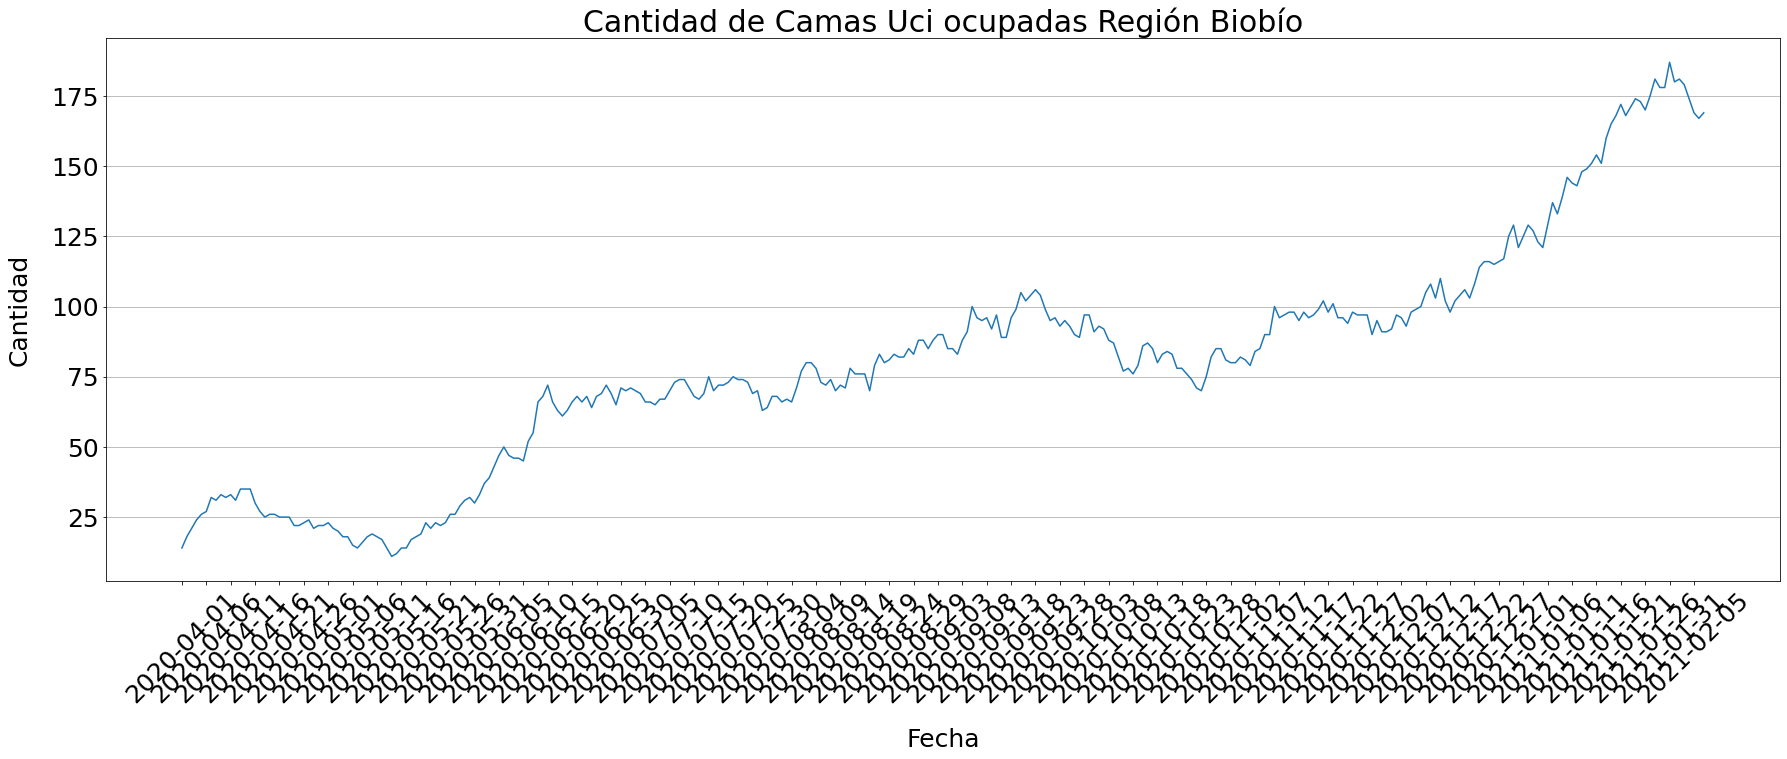

In [56]:
plt.figure(figsize=(30,10))
plt.plot(uci_biobio['Fecha'],uci_biobio['Biobío'])
plt.xlabel('Fecha',labelpad = 20,fontsize=25)
plt.ylabel('Cantidad',labelpad = 20, fontsize=25)
plt.xticks(uci_biobio['Fecha'][::5],rotation=45, fontsize=25)
plt.yticks(fontsize=25)
plt.gca().yaxis.grid(True)
plt.title('Cantidad de Camas Uci ocupadas Región Biobío',fontsize=30)
plt.savefig('camas_uci_biobio.png')

In [57]:
#Cantidad actual de camas
print('Hoy',uci_biobio.iloc[-1]["Fecha"],'hay',uci_biobio.iloc[-1]["Biobío"],'camas uci utilizadas')
#uci_biobio.iloc[-1][ ["Fecha","Biobío"] ]

Hoy 2021-02-07 hay 169 camas uci utilizadas


## Indice de movilidad región biobío

In [58]:
#Cargar datos
avion = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto40/TransporteAereo_std.csv')
#avion.columns

In [59]:
avion = avion.drop(['Inicio_semana', 'Fin_semana','Operaciones','Region_destino','Region_origen'],axis=1)
#avion

In [60]:
#cantidad de viajes / personas por semana
origen_biobio = avion[avion['Cod_region_origen'] == 8].reset_index(drop=True)
destino_biobio = avion[avion['Cod_region_destino'] == 8].reset_index(drop=True)

In [61]:
destinos = origen_biobio["Destino"].unique()

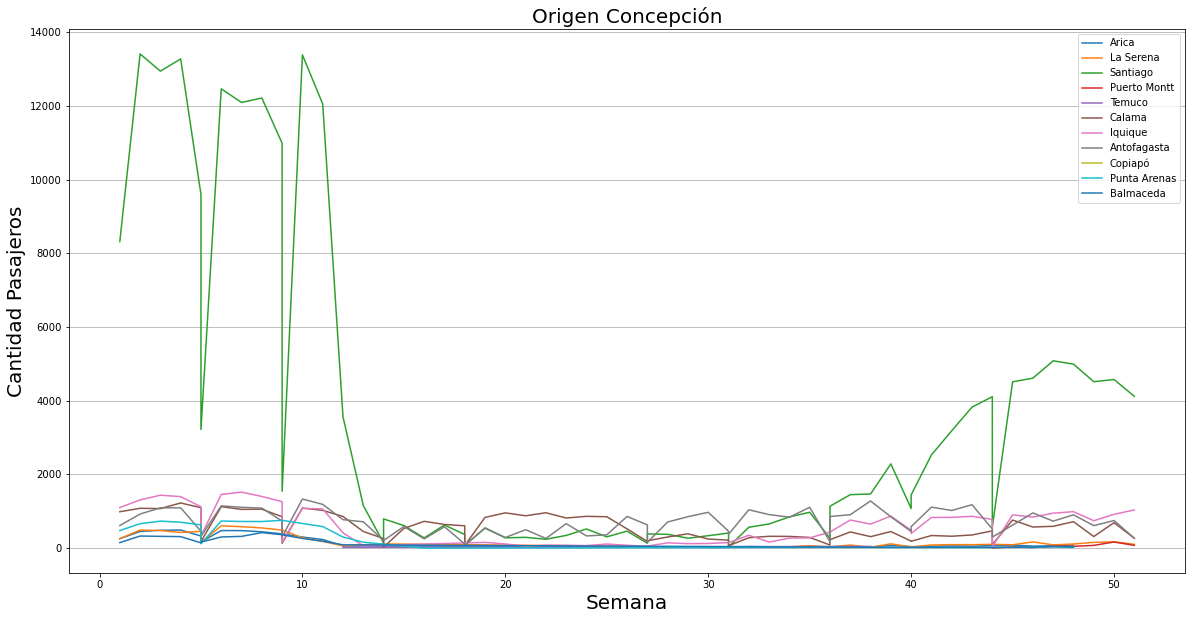

In [62]:
plt.figure(figsize=(20,10))
for destino in destinos:
    consulta = origen_biobio[origen_biobio["Destino"]==destino].sort_values(["Semana"])
    plt.plot(consulta["Semana"],consulta["Pasajeros"],label=destino)
plt.legend()
plt.xlabel("Semana", fontsize = 20)
plt.ylabel("Cantidad Pasajeros", fontsize = 20)
plt.title("Origen Concepción", fontsize = 20)
plt.gca().yaxis.grid(True)

In [63]:
semanas = np.sort(origen_biobio["Semana"].unique())
origenes= destino_biobio["Origen"].unique()

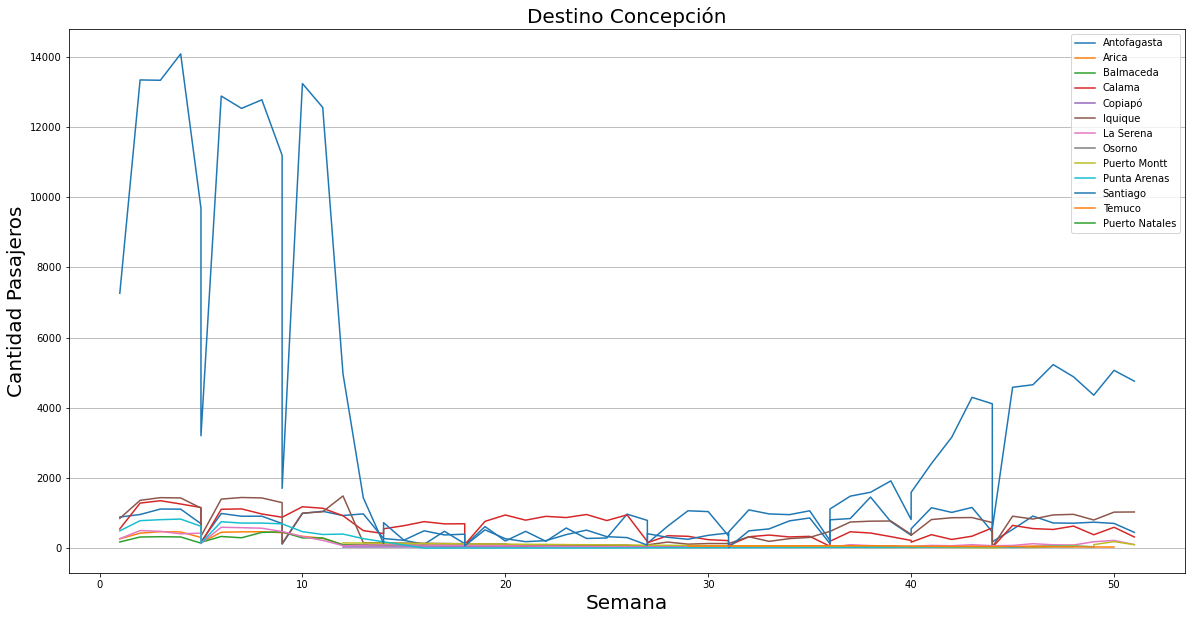

In [64]:
plt.figure(figsize=(20,10))
for origen in origenes:
    consulta = destino_biobio[destino_biobio["Origen"]==origen].sort_values(["Semana"])
    plt.plot(consulta["Semana"],consulta["Pasajeros"],label=origen)
plt.legend()
plt.xlabel("Semana", fontsize = 20)
plt.ylabel("Cantidad Pasajeros", fontsize = 20)
plt.title("Destino Concepción", fontsize = 20)
plt.gca().yaxis.grid(True)

In [65]:
destino_biobio[destino_biobio["Semana"]==1].sum()

Semana                                                                9
Origen                AntofagastaAricaBalmacedaCalamaIquiqueLa Seren...
Cod_region_origen                                                    72
Destino               ConcepciónConcepciónConcepciónConcepciónConcep...
Cod_region_destino                                                   72
Pasajeros                                                         10906
dtype: object

In [66]:
origen_biobio = origen_biobio.groupby(["Semana"]).sum()
destino_biobio = destino_biobio.groupby(["Semana"]).sum()

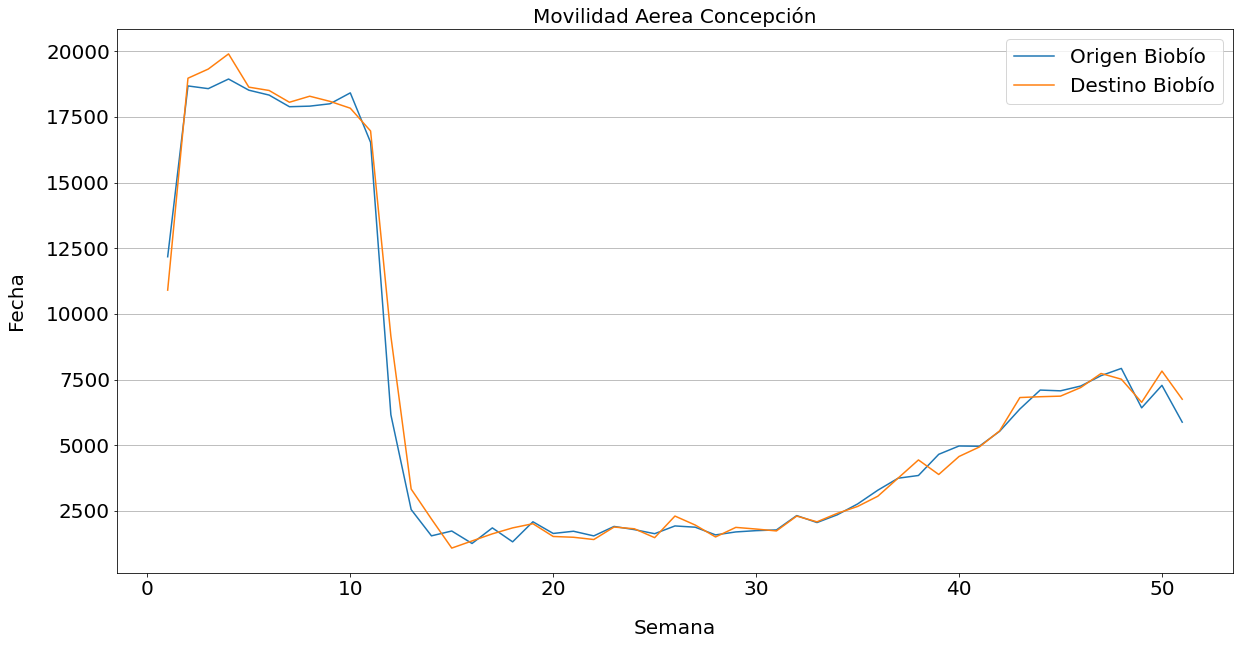

In [67]:
plt.figure(figsize=(20,10))
plt.plot(origen_biobio['Pasajeros'],label = 'Origen Biobío')
plt.plot(destino_biobio['Pasajeros'],label = 'Destino Biobío')
plt.xlabel('Semana',labelpad = 20,fontsize=20)
plt.ylabel('Fecha',labelpad = 20, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.title('Movilidad Aerea Concepción',fontsize=20)
plt.savefig('movilidad_aerea_conce.png')
plt.gca().yaxis.grid(True)

## Porcentaje población en cuarentena 

In [2]:
#Cargar datos
comunas_biobio = ["Arauco","Cañete","Contulmo","Curanilahue","Lebu","Los Álamos","Tirúa","Alto Biobío","Antuco","Cabrero","Laja","Los Ángeles","Mulchén","Nacimiento","Negrete","Quilaco","Quilleco","San Rosendo","Santa Bárbara","Tucapel","Yumbel","Chiguayante","Concepción","Coronel","Florida","Hualpén","Hualquí","Lota","Penco","San Pedro de la Paz","Santa Juana","Talcahuano",
"Tomé"]
comunas_cuarentena = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto29/Cuarentenas-Totales.csv')

In [3]:
comunas_mayus =[x.upper() for x in comunas_biobio]

In [4]:
#comunas_cuarentena[comunas_cuarentena["Nombre"].isin(comunas_biobio)]

In [5]:
comunas_cuarentena=comunas_cuarentena[comunas_cuarentena["n_REGION"]=="R08"].reset_index(drop=True)

In [6]:
len(comunas_biobio)

33

In [7]:
cant_comun_cuarentena = comunas_cuarentena.shape[0]

In [8]:
comunas_cuarentena = comunas_cuarentena[comunas_cuarentena['Estado'] == 'Activa']
comunas_cuarentena = comunas_cuarentena['Nombre']

In [9]:
comunas_cuarentena.values

array(['Cañete', 'Curanilahue', 'Arauco', 'Los Ángeles'], dtype=object)

In [10]:
comunas_cuarentena = [x.upper() for x in comunas_cuarentena.values]

In [11]:
#porcentaje comunas en cuarentena
porcentaje= (cant_comun_cuarentena*100)/len(comunas_biobio)
print('Porcentaje comunas en cuarentena: ', np.around(porcentaje,decimals=3),'%')

Porcentaje comunas en cuarentena:  57.576 %


In [12]:
#Porcentaje de poblacion en cuarentena
poblacion_total = pd.read_excel(r'Cantidad-de-Personas-por-Sexo-y-Edad.xlsx',sheet_name = 'COMUNAS',header=1, usecols = 'G,I,L')
poblacion_total = poblacion_total.dropna()
#poblacion_total

In [13]:
#poblacion_total['NOMBRE COMUNA'].unique()

In [14]:
poblacion_biobio = poblacion_total[poblacion_total['NOMBRE COMUNA'].isin(comunas_mayus)]
poblacion_biobio= poblacion_biobio[poblacion_biobio['Edad'] == 'Total Comunal'].reset_index(drop = True)
#poblacion_biobio

In [15]:
pobl_total = np.sum(poblacion_biobio['TOTAL'])
#pobl_total

In [16]:
#comunas_cuarentena

In [17]:
poblacion_cuarentena = poblacion_total[poblacion_total['NOMBRE COMUNA'].isin(comunas_cuarentena)]
poblacion_cuarentena = poblacion_cuarentena[poblacion_cuarentena['Edad'] == 'Total Comunal']

In [18]:
#poblacion_cuarentena

In [19]:
pobl_total_cuarentena =np.sum(poblacion_cuarentena['TOTAL'])
#pobl_total_cuarentena

In [20]:
#Porcentaje poblacion en cuarentena
porcentaje_pobl = (pobl_total_cuarentena*100)/pobl_total
print('Porcentaje de población en cuarentena:', np.around(porcentaje_pobl, decimals = 2),'%')

Porcentaje de población en cuarentena: 19.93 %


## DEFUNCIONES

In [24]:
defunciones=pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto38/CasosFallecidosPorComuna.csv")
# defunciones = defunciones[defunciones['Comuna'] == 'Concepcion']
# defunciones = defunciones.drop(['Region', 'Codigo region', 'Comuna', 'Codigo comuna', 'Poblacion'], axis=1).reset_index(drop=True)

In [25]:
defunciones = defunciones[defunciones['Region'] == 'Biobio'].drop(['Region', 'Codigo region', 'Comuna', 'Codigo comuna', 'Poblacion'], axis=1).reset_index(drop=True)

Text(0.5, 1.0, 'Cantidad de Defunciones concepción')

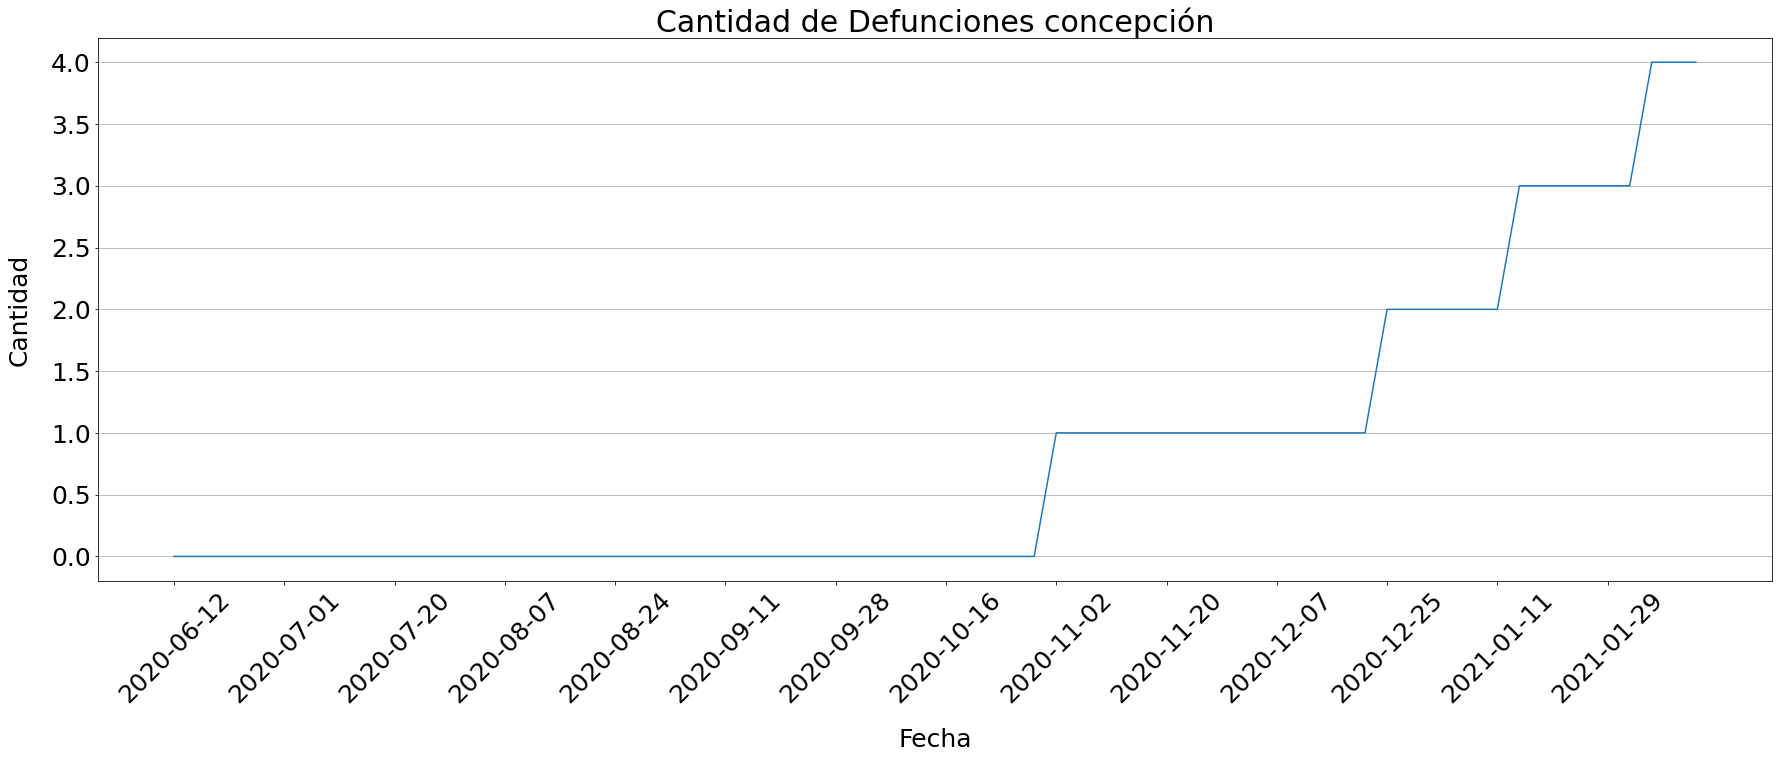

In [28]:
plt.figure(figsize=(30,10))
plt.plot(defunciones.iloc[0].index,defunciones.iloc[0].values)
plt.xlabel('Fecha',labelpad = 20,fontsize=25)
plt.ylabel('Cantidad',labelpad = 20, fontsize=25)
plt.xticks(defunciones.iloc[0].index[::5],rotation=45, fontsize=25)
plt.yticks(fontsize=25)
plt.gca().yaxis.grid(True)
plt.title('Cantidad de Defunciones concepción',fontsize=30)


In [89]:
defunciones.iloc[0].last()

TypeError: last() missing 1 required positional argument: 'offset'